# Proyecto 1 - Celsius a Farenheit

### Importar las librerías


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2024-05-28 22:07:21.887274: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Importar el dataset

In [2]:
url = 'https://raw.githubusercontent.com/alejocampos1/AI-Projects/Projecto-1/Proyecto%201/celsius_a_fahrenheit.csv'
temperature_df = pd.read_csv(url)

### Visualización del dataset

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

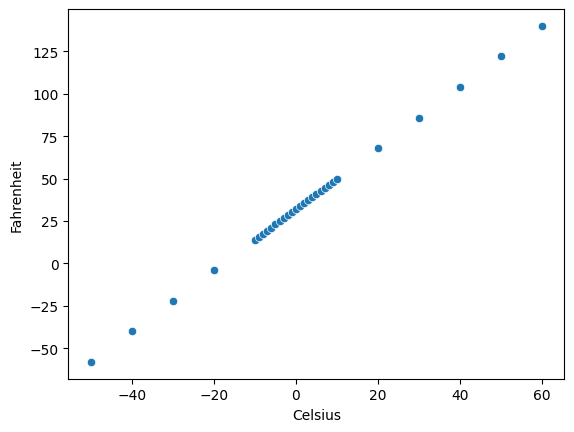

In [3]:
#Se necesita especificar el eje que va a asignarse a cada columna
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])

### Crear set de entrenamiento

In [4]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

### Crear modelo AI

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/opt/anaconda3/envs/proyecto_modelos/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Compilado

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss='mean_squared_error')

### Entrenando el modelo

In [8]:
epochs_history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - loss: 4816.5850
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2480.1663
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1192.3315
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 840.8457
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1108.7567
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1521.4448
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1719.6919
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1619.1565
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1314.1873
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 947.5693
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 641.2819
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 467.2536
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 437.1372
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 508.0764
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/st

### Evaluación del modelo

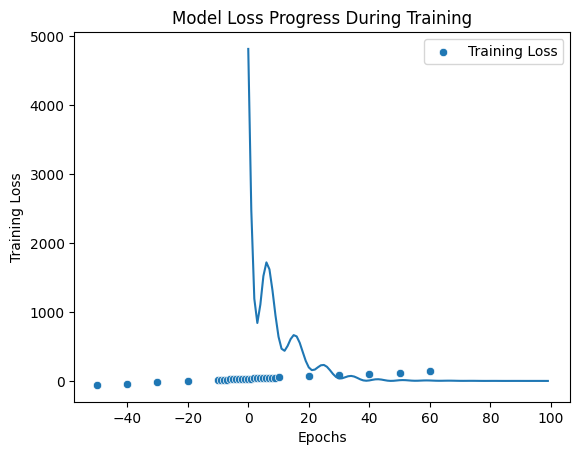

In [9]:
epochs_history.history.keys()

sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])
plt.plot(epochs_history.history['loss'], )
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])


In [10]:
model.get_weights()

[array([[1.8064165]], dtype=float32), array([31.807835], dtype=float32)]

### Predicciones

In [11]:
temp_c = 0
temp_c_array = np.array([[temp_c]], dtype=float)  # Convertir a una matriz 2D
temp_f = model.predict(temp_c_array)
print(temp_f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[31.807835]]


In [12]:
temp_f = 9/5 * temp_c + 32
print(temp_f)

32.0
